In [125]:
import pandas as pd

## Read CSV and convert string to datetime64[ns]

In [126]:
df = pd.read_csv("../data/feed-views.log", names=["datetime", "user"], sep="\\t", engine="python")
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S.%f")
df["year"] = pd.DatetimeIndex(df["datetime"]).year
df["month"] = pd.DatetimeIndex(df["datetime"]).month
df["day"] = pd.DatetimeIndex(df["datetime"]).day
df["hour"] = pd.DatetimeIndex(df["datetime"]).hour
df["minute"] = pd.DatetimeIndex(df["datetime"]).minute
df["second"] = pd.DatetimeIndex(df["datetime"]).second
df

,datetime,user,year,month,day,hour,minute,second
0,2020-04-17 12:01:08.463179,artem,2020,4,17,12,1,8
1,2020-04-17 12:01:23.743946,artem,2020,4,17,12,1,23
2,2020-04-17 12:27:30.646665,artem,2020,4,17,12,27,30
3,2020-04-17 12:35:44.884757,artem,2020,4,17,12,35,44
4,2020-04-17 12:35:52.735016,artem,2020,4,17,12,35,52
...,...,...,...,...,...,...,...,...
1071,2020-05-21 18:45:20.441142,valentina,2020,5,21,18,45,20
1072,2020-05-21 23:03:06.457819,maxim,2020,5,21,23,3,6
1073,2020-05-21 23:23:49.995349,pavel,2020,5,21,23,23,49
1074,2020-05-21 23:49:22.386789,artem,2020,5,21,23,49,22


## Create new column, in which we need to categorize users time to certain part of the day.
 Subject recommends us to use pandas method "cut", but according to pandas documentation this methods splits data on equal bins, whether given intervals are not equal.

In [127]:
interval = pd.IntervalIndex.from_tuples([(0, 4), (4, 7), (7, 11), 
                              (11, 17), (17, 20), (20, 24)], closed="left")
lab = ["night", "early morning", "morning", "afternoon", "early evening", "evening"]

daytime = pd.cut(df["hour"], bins = interval)

int_to_daytime = dict(zip(interval, lab))

daytime = daytime.apply(lambda x: int_to_daytime[x])
df["daytime"] = daytime
df.set_index(["user"], drop=True, inplace=True)
# df.drop(["user"], axis=1, inplace=True)

In [128]:
df

,datetime,year,month,day,hour,minute,second,daytime
user,,,,,,,,
artem,2020-04-17 12:01:08.463179,2020,4,17,12,1,8,afternoon
artem,2020-04-17 12:01:23.743946,2020,4,17,12,1,23,afternoon
artem,2020-04-17 12:27:30.646665,2020,4,17,12,27,30,afternoon
artem,2020-04-17 12:35:44.884757,2020,4,17,12,35,44,afternoon
artem,2020-04-17 12:35:52.735016,2020,4,17,12,35,52,afternoon
...,...,...,...,...,...,...,...,...
valentina,2020-05-21 18:45:20.441142,2020,5,21,18,45,20,early evening
maxim,2020-05-21 23:03:06.457819,2020,5,21,23,3,6,evening
pavel,2020-05-21 23:23:49.995349,2020,5,21,23,23,49,evening


## Calculate the number of elements in dataframe

In [129]:
df.count()

datetime    1076
year        1076
month       1076
day         1076
hour        1076
minute      1076
second      1076
daytime     1076
dtype: int64

In [130]:
df["daytime"].value_counts()

evening          509
afternoon        252
early evening    145
night            129
morning           36
early morning      5
Name: daytime, dtype: int64

## Sort values

In [131]:
df.sort_values(by = ["hour", "day", "minute"], inplace=True)

In [132]:
df

,datetime,year,month,day,hour,minute,second,daytime
user,,,,,,,,
konstantin,2020-05-06 00:38:00.562420,2020,5,6,0,38,0,night
konstantin,2020-05-06 00:38:57.672657,2020,5,6,0,38,57,night
konstantin,2020-05-10 00:13:42.216836,2020,5,10,0,13,42,night
konstantin,2020-05-10 00:14:05.765256,2020,5,10,0,14,5,night
pavel,2020-05-10 00:17:03.110482,2020,5,10,0,17,3,night
...,...,...,...,...,...,...,...,...
maxim,2020-04-26 23:17:39.909301,2020,4,26,23,17,39,evening
artem,2020-04-26 23:41:18.281836,2020,4,26,23,41,18,evening
konstantin,2020-04-28 23:07:20.698279,2020,4,28,23,7,20,evening


## Calculate some statistics

calculate the maximum of hour for the rows where the time of day is night:

In [133]:
night_max = df.loc[df["daytime"] == "night", "hour"].max()
instance_of_night_user = df.loc[df["hour"] == night_max].index[0]
print(f"Maximum hour at night daytime: {night_max}")
print(f"Example of user who visited our service at night: {instance_of_night_user}")

Maximum hour at night daytime: 3
Example of user who visited our service at night: konstantin


calculate the minimum of hour for the rows where the time of day is morning:

In [134]:
morning_min = df.loc[df["daytime"] == "morning", "hour"].min()
instance_of_morning_user = df.loc[df["hour"] == morning_min].index[0]
print(f"Minimum hour at morning daytime: {morning_min}")
print(f"Example of user who visited our service at morning: {instance_of_morning_user}")

Minimum hour at morning daytime: 8
Example of user who visited our service at morning: alexander


In [135]:
print(f"Mode of hour: {df['hour'].mode()[0]}")
print(f"Mode of daytime: {df['daytime'].mode()[0]}")

Mode of hour: 22
Mode of daytime: evening


In [136]:
df[df["daytime"] == "morning"].nsmallest(3, columns = "hour")["hour"]


user
alexander    8
alexander    8
anatoliy     9
Name: hour, dtype: int64

In [137]:
df[df["daytime"] == "morning"].nlargest(3, columns = "hour")["hour"]

user
konstantin    10
konstantin    10
konstantin    10
Name: hour, dtype: int64

## Describe method and interquartile range

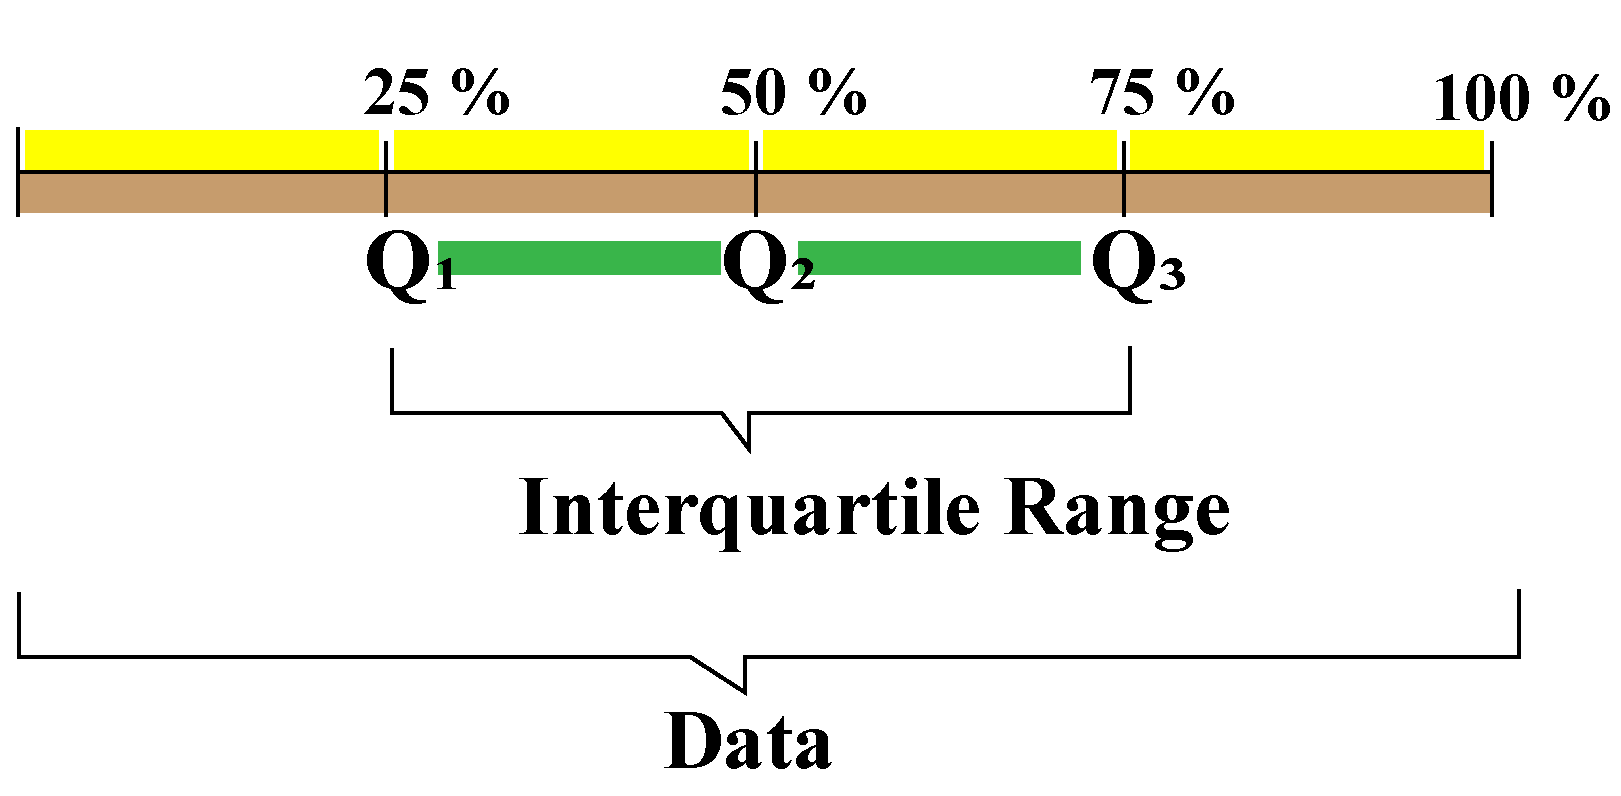

In [138]:
descr = df.describe()
descr

,year,month,day,hour,minute,second
count,1076.0,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000
mean,2020.0,4.870818,13.552974,16.249071,29.629182,29.500929
std,0.0,0.335557,4.906567,6.955490,17.689388,17.405506
min,2020.0,4.000000,1.000000,0.000000,0.000000,0.000000
25%,2020.0,5.000000,11.000000,13.000000,14.000000,14.000000
50%,2020.0,5.000000,13.000000,19.000000,29.000000,30.000000
75%,2020.0,5.000000,15.000000,22.000000,46.000000,45.000000
max,2020.0,5.000000,30.000000,23.000000,59.000000,59.000000


In [139]:
iqr = (descr.loc["25%", "hour"], descr.loc["75%", "hour"])
iqr

(13.0, 22.0)